In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import pickle 
#import mglearn
import time


from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


# CountVectorizer -- Brief Tutorial

*    CountVectorizer can lowercase letters, disregard punctuation and stopwords, but it can't LEMMATIZE or STEM

In [21]:
txt = ["He is ::having a great Time, at the park time?",
       "She, unlike most women, is a big player on the park's grass.",
       "she can't be going"]

**Features in Bag of Words**

In [23]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None)

# Transforms the data into a bag of words
# fit(raw_documents[, y]) 	Learn a vocabulary dictionary of all tokens in the raw documents.
# transform(raw_documents) 	Transform documents to document-term matrix.
# fit_transform(raw_documents[, y]) 	Learn the vocabulary dictionary and return term-document matrix.
count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("Vocabulary:\n{}".format(count_vec.vocabulary_))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['big', 'big player', 'going', 'grass', 'great', 'great time', 'having', 'having great', 'park', 'park grass', 'park time', 'player', 'player park', 'time', 'time park', 'unlike', 'unlike women', 'women', 'women big']
Vocabulary:
{'having': 6, 'great': 4, 'time': 13, 'park': 8, 'having great': 7, 'great time': 5, 'time park': 14, 'park time': 10, 'unlike': 15, 'women': 17, 'big': 0, 'player': 11, 'grass': 3, 'unlike women': 16, 'women big': 18, 'big player': 1, 'player park': 12, 'park grass': 9, 'going': 2}

Every 3rd feature:
['big', 'grass', 'having', 'park grass', 'player park', 'unlike', 'women big']


**Vocabulary and vocabulary ID**

In [24]:
print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 19
Vocabulary content:
 {'having': 6, 'great': 4, 'time': 13, 'park': 8, 'having great': 7, 'great time': 5, 'time park': 14, 'park time': 10, 'unlike': 15, 'women': 17, 'big': 0, 'player': 11, 'grass': 3, 'unlike women': 16, 'women big': 18, 'big player': 1, 'player park': 12, 'park grass': 9, 'going': 2}


# N-grams (sets of consecutive words)
* N=2
**ngram_range**: An n-gram is just a string of n words in a row. E.g. the sentence ‘I am Groot’ contains the 2-grams ‘I am’ and ‘am Groot’. The sentence is itself a 3-gram. Set the parameter ngram_range=(a,b) where a is the minimum and b is the maximum size of ngrams you want to include in your features. The default ngram_range is (1,1).
In a recent project where I modeled job postings online, I found that including 2-grams as features boosted my model’s predictive power significantly. This makes intuitive sense; many job titles such as ‘data scientist’, ‘data engineer’, and ‘data analyst’ are 2 words long.

In [25]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'big player', 'going', 'grass', 'great', 'great time', 'having', 'having great', 'park', 'park grass', 'park time', 'player', 'player park', 'time', 'time park', 'unlike', 'unlike women', 'women', 'women big']


* N=3

In [26]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'big player', 'big player park', 'going', 'grass', 'great', 'great time', 'great time park', 'having', 'having great', 'having great time', 'park', 'park grass', 'park time', 'player', 'player park', 'player park grass', 'time', 'time park', 'time park time', 'unlike', 'unlike women', 'unlike women big', 'women', 'women big', 'women big player']


# Min_df

**Min_df ignores terms that have a document frequency (presence in % of documents) strictly lower than the given threshold. For example, Min_df=0.66 requires that a term appear in 66% of the docuemnts for it to be considered part of the vocabulary.

**Sometimes min_df is used to limit the vocabulary size, so it learns only those terms that appear in at least 10%, 20%, etc. of the documents.**

In [27]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=0.6, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())
print("\nOnly 'park' becomes the vocabulary of the document term matrix (dtm) because it appears in 2 out of 3 documents, \
meaning 0.66% of the time.\
      \nThe rest of the words such as 'big' appear only in 1 out of 3 documents, meaning 0.33%. which is why they don't appear")

['park']

Only 'park' becomes the vocabulary of the document term matrix (dtm) because it appears in 2 out of 3 documents, meaning 0.66% of the time.      
The rest of the words such as 'big' appear only in 1 out of 3 documents, meaning 0.33%. which is why they don't appear


# Max_df

**When building the vocabulary, it ignores terms that have a document frequency strictly higher than the given threshold. This could be used to exclude terms that are too frequent and are unlikely to help predict the label. For example, by analyzing reviews on the movie Lion King, the term 'Lion' might appear in 90% of the reviews (documents), in which case, we could consider establishing Max_df=0.89**

In [28]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=0.50, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())
print("\nOnly 'park' is ignored because it appears in 2 out of 3 documents, meaning 0.66% of the time.")

['big', 'going', 'grass', 'great', 'having', 'player', 'time', 'unlike', 'women']

Only 'park' is ignored because it appears in 2 out of 3 documents, meaning 0.66% of the time.


# Max_features

**Limit the amount of features (vocabulary) that the vectorizer will learn**

In [29]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=4)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'going', 'park', 'time']


# TfidfVectorizer -- Brief Tutorial

The goal of using tf-idf is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus. (https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/feature_extraction/text.py#L1365)

formula used: 
tf-idf(d, t) = tf(t) * idf(d, t)
                * tf(t)= the term frequency is the number of times the term appears in the document
                * idf(d, t) = the document frequency is the number of documents 'd' that contain term 't'

In [30]:
txt1 = ['His smile was not perfect', 'His smile was not not not not perfect', 'she not sang']
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(txt1)
txt_transformed = txt_fitted.transform(txt1)
print ("The text: ", txt1)

The text:  ['His smile was not perfect', 'His smile was not not not not perfect', 'she not sang']


The learned corpus vocabulary

In [31]:
tf.vocabulary_

{'his': 0, 'smile': 5, 'was': 6, 'not': 1, 'perfect': 2, 'she': 4, 'sang': 3}

**IDF:** The inverse document frequency

In [32]:
idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names(), idf)))
print("\nWe see that the tokens 'sang','she' have the most idf weight because \
they are the only tokens that appear in one document only.")
print("\nThe token 'not' appears 6 times but it is also in all documents, so its idf is the lowest")

{'his': 1.4054651081081644, 'not': 1.0, 'perfect': 1.4054651081081644, 'sang': 2.09861228866811, 'she': 2.09861228866811, 'smile': 1.4054651081081644, 'was': 1.4054651081081644}

We see that the tokens 'sang','she' have the most idf weight because they are the only tokens that appear in one document only.

The token 'not' appears 6 times but it is also in all documents, so its idf is the lowest


Graphing inverse document frequency

In [33]:
rr = dict(zip(txt_fitted.get_feature_names(), idf))

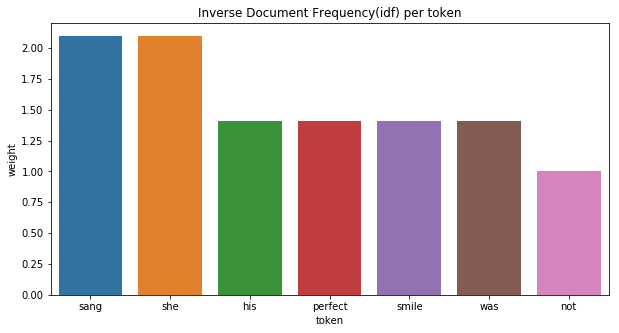

In [34]:
token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight 

sns.barplot(x='token', y='weight', data=token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

Listing (instead of graphing) inverse document frequency

In [35]:
# get feature names
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-3:]]))

Features with lowest idf:
['not' 'his' 'perfect']

Features with highest idf:
['was' 'sang' 'she']


**Weight of tokens per document**

In [36]:
print("The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1\
 its weight is 0 because it does not appear there.")
txt_transformed.toarray()

The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1 its weight is 0 because it does not appear there.


array([[1.40546511, 1.        , 1.40546511, 0.        , 0.        ,
        1.40546511, 1.40546511],
       [1.40546511, 4.        , 1.40546511, 0.        , 0.        ,
        1.40546511, 1.40546511],
       [0.        , 1.        , 0.        , 2.09861229, 2.09861229,
        0.        , 0.        ]])

* Summary: the more times a token appears in a document, the more weight it will have. However, the more documents the token appears in, it is 'penalized' and the weight is diminished. For example, the weight for token 'not' is 4, but if it did not appear in all documents (that is, only in one document) its weight would have been 8.3

**TF-IDF** - Maximum token value throughout the whole dataset

In [37]:
new1 = tf.transform(txt1)

# find maximum value for each of the features over all of dataset:
max_val = new1.max(axis=0).toarray().ravel()

#sort weights from smallest to biggest and extract their indices 
sort_by_tfidf = max_val.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sort_by_tfidf[:3]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sort_by_tfidf[-3:]]))

Features with lowest tfidf:
['his' 'perfect' 'smile']

Features with highest tfidf: 
['sang' 'she' 'not']


# Clean, Train, Vectorize, Classify Toxic Comments (w/o parameter tuning)

In [38]:
train = pd.read_csv('../input/train.csv')
holdout = pd.read_csv('../input/test.csv').fillna(' ')

In [39]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


**Clean Train text**

In [40]:
"""Lemmatizing and stemming gives us a lower ROC-AUC score. So we will only clean \\n's, Username, IP and http links"""

start_time=time.time()
# remove '\\n'
# map() function returns a list of the results after applying the given function 
# to each item of a given iterable (list, tuple etc.) 
train['comment_text'] = train['comment_text'].map(lambda x: re.sub('\\n',' ',str(x)))
    
# remove any text starting with User... 
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
    
# remove IP addresses or user IDs
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    
#remove http links in the text
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))

end_time=time.time()
print("total time",end_time-start_time)

total time 4.977496385574341


Cleaning HOLDOUT text

In [41]:
# remove '\\n'
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub('\\n',' ',str(x)))
    
# remove any text starting with User... 
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
    
# remove IP addresses or user IDs
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    
#remove http links in the text
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))

In [42]:
x = train['comment_text']
y = train.iloc[:, 2:8]  

**Train**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(127656,)
(127656, 6)
(31915,)
(31915, 6)


**Vectorize**

In [45]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 1),
    max_features=30000)

# fit and transform on it the training features
word_vectorizer.fit(X_train)
X_train_word_features = word_vectorizer.transform(X_train)

#transform the test features to sparse matrix
test_features = word_vectorizer.transform(X_test)

# transform the holdout text for submission at the end
holdout_text = holdout['comment_text']
holdout_word_features = word_vectorizer.transform(holdout_text)

# Classify 
* Run a Logistic regression on each label separately

In [46]:
class_names = ['toxic','severe_toxic','obscene', 'threat', 'insult', 'identity_hate']

losses = []
auc = []

for class_name in class_names:
    #call the labels one column at a time so we can run the classifier on them
    train_target = y_train[class_name]
    test_target = y_test[class_name]
    classifier = LogisticRegression(solver='sag', C=10)

    cv_loss = np.mean(cross_val_score(classifier, X_train_word_features, train_target, cv=5, scoring='neg_log_loss'))
    losses.append(cv_loss)
    print('CV Log_loss score for class {} is {}'.format(class_name, cv_loss))

    cv_score = np.mean(cross_val_score(classifier, X_train_word_features, train_target, cv=5, scoring='accuracy'))
    print('CV Accuracy score for class {} is {}'.format(class_name, cv_score))
    
    classifier.fit(X_train_word_features, train_target)
    y_pred = classifier.predict(test_features)
    y_pred_prob = classifier.predict_proba(test_features)[:, 1]
    auc_score = metrics.roc_auc_score(test_target, y_pred_prob)
    auc.append(auc_score)
    print("CV ROC_AUC score {}\n".format(auc_score))
    
    print(confusion_matrix(test_target, y_pred))
    print(classification_report(test_target, y_pred))

print('Total average CV Log_loss score is {}'.format(np.mean(losses)))
print('Total average CV ROC_AUC score is {}'.format(np.mean(auc)))


CV Log_loss score for class toxic is -0.11565061140627655
CV Accuracy score for class toxic is 0.9589835178269303
CV ROC_AUC score 0.9655634267749371

[[28571   356]
 [  965  2023]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28927
           1       0.85      0.68      0.75      2988

   micro avg       0.96      0.96      0.96     31915
   macro avg       0.91      0.83      0.87     31915
weighted avg       0.96      0.96      0.96     31915

CV Log_loss score for class severe_toxic is -0.028702219293663615
CV Accuracy score for class severe_toxic is 0.9901923827175312
CV ROC_AUC score 0.9819668367570655

[[31533    79]
 [  213    90]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31612
           1       0.53      0.30      0.38       303

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.76      0.65      0.69     31915
weighted avg       0.9

# Vectorize, Classify (with parameter tuning)

In [53]:
x = train['comment_text']
y = train.iloc[:, 2:8]  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

In [51]:
start_time=time.time()

pipe = make_pipeline(TfidfVectorizer(
                                    stop_words='english',
                                    strip_accents='unicode',
                                    token_pattern=r'\w{1,}', #accept tokens that have 1 or more characters
                                    analyzer='word',
                                    ngram_range=(1, 1),
                                    min_df=5),
                     OneVsRestClassifier(LogisticRegression()))
param_grid = {'tfidfvectorizer__max_features': [10000, 30000],
              'onevsrestclassifier__estimator__solver': ['liblinear', 'sag'],
             } 
grid = GridSearchCV(pipe, param_grid, cv=3, scoring='roc_auc')

grid3 = grid.fit(X_train, y_train)

end_time=time.time()
print("total time",end_time-start_time)

total time 253.11399507522583


# Pickle the classifier

Use Pickle to save files, documents, trained algorithms, etc., on your computer. In this case, we are saving our PC's processor the time it would take it to fit and transform all the text and run a logistic regression(345 seconds).

In [ ]:
# Save classifier to a file

# save_classifier = open("Tfidf_LogR_3.pickle", 'wb') #wb= write in bytes. 
# pickle.dump(grid3, save_classifier) #use pickle to dump the grid3 we trained, as 'Tfidf_LogR.pickle' in wb format
# save_classifier.close() 

In [ ]:
# Retrieve the saved file and uplaod it to an object

# vec = open("Tfidf_LogR_3.pickle", 'rb') # rb= read in bytes
# grid3 = pickle.load(vec)
# vec.close()

# Analysis

In [54]:
print(grid3.best_estimator_.named_steps['onevsrestclassifier'])
print(grid3.best_estimator_.named_steps['tfidfvectorizer'])

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=30000, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=True,
        vocabulary=None)


In [55]:
grid3.best_params_

{'onevsrestclassifier__estimator__solver': 'sag',
 'tfidfvectorizer__max_features': 30000}

In [56]:
grid3.best_score_

0.9778243951684296

In [57]:
predicted_y_test = grid3.predict(X_test)

We see that our recall is the lowest with severely toxic, threats, and identity_ hate comments. Perhaps if we had a higher number of comments (more data) in those categories, our classifier would do better

In [58]:
print("Toxic Confusion Matrixs: \n{}".format(confusion_matrix(y_test['toxic'], predicted_y_test[:,0])))
print("\nSevere Toxic: \n{}".format(confusion_matrix(y_test['severe_toxic'], predicted_y_test[:,1])))
print("\nObscene: \n{}".format(confusion_matrix(y_test['obscene'], predicted_y_test[:,2])))
print("\nThreat: \n{}".format(confusion_matrix(y_test['threat'], predicted_y_test[:,3])))
print("\nInsult: \n{}".format(confusion_matrix(y_test['insult'], predicted_y_test[:,4])))
print("\nIdentity Hate: \n{}".format(confusion_matrix(y_test['identity_hate'], predicted_y_test[:,5])))

print("\nToxic Classification report: \n{}".format(classification_report(y_test['toxic'], predicted_y_test[:,0])))
print("\nSevere Toxic: \n{}".format(classification_report(y_test['severe_toxic'], predicted_y_test[:,1])))
print("\nObscene: \n{}".format(classification_report(y_test['obscene'], predicted_y_test[:,2])))
print("\nThreat: \n{}".format(classification_report(y_test['threat'], predicted_y_test[:,3])))
print("\nInsult: \n{}".format(classification_report(y_test['insult'], predicted_y_test[:,4])))
print("\nIdentity Hate: \n{}".format(classification_report(y_test['identity_hate'], predicted_y_test[:,5])))


Toxic Confusion Matrixs: 
[[28766   161]
 [ 1235  1753]]

Severe Toxic: 
[[31558    54]
 [  234    69]]

Obscene: 
[[30209    82]
 [  598  1026]]

Threat: 
[[31815    10]
 [   76    14]]

Insult: 
[[30235   177]
 [  755   748]]

Identity Hate: 
[[31617    21]
 [  233    44]]

Toxic Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28927
           1       0.92      0.59      0.72      2988

   micro avg       0.96      0.96      0.96     31915
   macro avg       0.94      0.79      0.85     31915
weighted avg       0.95      0.96      0.95     31915


Severe Toxic: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31612
           1       0.56      0.23      0.32       303

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.78      0.61      0.66     31915
weighted avg       0.99      0.99      0.99     31915


Obscene: 
            

In [ ]:
# grid3.cv_results_

In [59]:
vectorizer = grid3.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_test_set = vectorizer.transform(X_test)


# find maximum value for each of the features over dataset:
max_value = X_test_set.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['overstating' 'tusc' 'leona' 'ashish' 'tvs' 'divorcing' 'chandler'
 'spoon' 'ashoka' 'ashraf' 'chandigarh' 'sporadically' 'jurors' 'queues'
 'diwan' 'grabs' 'sportsman' 'oppressing' 'warms' 'aslo']

Features with highest tfidf: 
['russian' 'source' 'yes' 's' 'paranoia' 'called' 'template' 'natural'
 'fish' 'soon' 'understand' 'fine' 'canon' 'nazi' 'inserted' 'solved'
 'information' 'career' 'filter' 'pwned']


In [60]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['s' 't' 'article' 'page' 'talk' 'wikipedia' 'just' 'like' 'don' 'think'
 'know' 'm' 'edit' 'people' 'time' 'did' 'thanks' 'articles' 'make' 'use'
 'good' 'does' 've' 'want' 'way' 'need' 'thank' 'information' 'editing'
 'user' 'say' 'new' 'really' 'pages' 'sources' 'help' 'edits' 'look'
 'section' 'add' 'source' 'wp' 'used' 'right' 'work' 'point' 'discussion'
 'read' 'll' 'deleted' 'fact' 'utc' 'going' 'blocked' 'stop' 'said' 'd'
 'added' 'sure' 'removed' 'link' 'let' 'better' 'doesn' 'reason' 'feel'
 'list' 'place' 'actually' 'note' 'content' 'case' 'using' 'history' 'hi'
 'believe' 'deletion' 'editors' 'free' '2' 'comment' 'things' 'person'
 'question' 'personal' 'thing' '1' 'didn' 'ask' 'comments' 'vandalism'
 'best' 'remove' 'hope' 'wrong' 'problem' 'little' 'trying' 'change'
 'wiki']


# Graphing coefficients of tokens in toxic comments

This would work only once you downlaod the mglearn library, as it does not exist on Kaggle. Many thanks to Andreas Mueller. This is his work and code: https://github.com/amueller/introduction_to_ml_with_python/blob/master/07-working-with-text-data.ipynb 
* Toxic

In [ ]:
# print(y_train.columns)
# print("\n-Columns are ordered as above, which is why coef_[0] refers to toxic and coef_[5] refers to identity hate.")
# print("-The blue bars refer to the label (toxic here) and the red refer to Not toxic")
# mglearn.tools.visualize_coefficients(
#     grid3.best_estimator_.named_steps["onevsrestclassifier"].coef_[0],
#     feature_names, n_top_features=40)

* Severe toxic

In [ ]:
# mglearn.tools.visualize_coefficients(
#     grid3.best_estimator_.named_steps["onevsrestclassifier"].coef_[1],
#     feature_names, n_top_features=40)

* Identity Hate

In [ ]:
# mglearn.tools.visualize_coefficients(
#     grid3.best_estimator_.named_steps["onevsrestclassifier"].coef_[5],
#     feature_names, n_top_features=40)

# Submission

In [ ]:
holdout_comments = holdout['comment_text']
# holdoutComments are automatically transformed throguh the grid3 pipeline before prodicting probabilities
twod = grid3.predict_proba(holdout_comments)

In [ ]:
holdout_predictions = {}
holdout_predictions = {'id': holdout['id']}  

holdout_predictions['toxic']=twod[:,0]
holdout_predictions['severe_toxic']=twod[:,1]
holdout_predictions['obscene']=twod[:,2]
holdout_predictions['threat']=twod[:,3]
holdout_predictions['insult']=twod[:,4]
holdout_predictions['identity_hate']=twod[:,5]
    
submission = pd.DataFrame.from_dict(holdout_predictions)
submission = submission[['id','toxic','severe_toxic','obscene','threat','insult','identity_hate']] #rearrange columns
submission.to_csv('submission.csv', index=False)

# Bonus: Adding features to pipeline

In [ ]:
# calculate lenght of characters in each comment
train['len_character'] = train['comment_text'].apply(lambda x: len(re.findall(r"[\w]", str(x))))

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion #unites all arrays into one array
from sklearn.pipeline import Pipeline

In [ ]:
x = train[['comment_text','len_character']] #these will be our features
y = train.iloc[:, 2:8]  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

Divide features into numeric and text features, so we can feed into the pipeline later

In [ ]:
# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda a: a[['len_character']], validate=False)
get_text_data = FunctionTransformer(lambda a: a['comment_text'], validate=False)

print(get_text_data.fit_transform(X_train).shape)
print(get_numeric_data.fit_transform(X_train).shape)

In [ ]:
pl = Pipeline([
        ('union', FeatureUnion(                      #unites both text and numeric arrays into one array
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data)
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', TfidfVectorizer(
                                                    stop_words='english',
                                                    strip_accents='unicode',
                                                    token_pattern=r'\w{2,}',
                                                    analyzer='word',
                                                    ngram_range=(1, 1),
                                                    min_df=5))
                ]))
             ]
        )), #right here is where we would put interaction terms preprocessing such as PolynomialFeatures
            #(right here is where we would put a scaler if we needed one)
        ('clf', OneVsRestClassifier(LogisticRegression())) 
    ])

In [ ]:
param_grid = {'union__text_features__vectorizer__max_features': [10000, 30000],
              'clf__estimator__C': [0.1, 1]
             } 
grid = GridSearchCV(pl, param_grid, cv=3, scoring='roc_auc')

grid4 = grid.fit(X_train, y_train)

In [ ]:
# # Pickle grid4 to your computer
#dill: this is necessary in order for pickle to save grid4 which has a lambda function inside of it.
import dill as pickled

# save_grid4 = open("Tfidf_LogR_4.pickle", 'wb') #wb= write in bytes. 'Tfidf_LogR.pickle' is the name of the file saved
# pickled.dump(grid4, save_grid4) #use pickle to dump the grid1 we trained as 'Tfidf_LogR.pickle' in wb format
# save_grid4.close() 

In [ ]:
import dill as pickled
# Retrieve the saved file and uplaod it to an object

# vec4 = open("Tfidf_LogR_4.pickle", 'rb') # rb= read in bytes
# grid4 = pickled.load(vec4)
# vec4.close()

In [ ]:
print(grid4.best_score_)
print(grid4.best_params_)
print(grid4.estimator)

In [ ]:
pred_y_test = grid4.predict(X_test)

print("Toxic Confusion Matrixs: \n{}".format(confusion_matrix(y_test['toxic'], pred_y_test[:,0])))
print("\nSevere Toxic: \n{}".format(confusion_matrix(y_test['severe_toxic'], pred_y_test[:,1])))
print("\nObscene: \n{}".format(confusion_matrix(y_test['obscene'], pred_y_test[:,2])))
print("\nThreat: \n{}".format(confusion_matrix(y_test['threat'], pred_y_test[:,3])))
print("\nInsult: \n{}".format(confusion_matrix(y_test['insult'], pred_y_test[:,4])))
print("\nIdentity Hate: \n{}".format(confusion_matrix(y_test['identity_hate'], pred_y_test[:,5])))

print("\nToxic Classification report: \n{}".format(classification_report(y_test['toxic'], pred_y_test[:,0])))
print("\nSevere Toxic: \n{}".format(classification_report(y_test['severe_toxic'], pred_y_test[:,1])))
print("\nObscene: \n{}".format(classification_report(y_test['obscene'], pred_y_test[:,2])))
print("\nThreat: \n{}".format(classification_report(y_test['threat'], pred_y_test[:,3])))
print("\nInsult: \n{}".format(classification_report(y_test['insult'], pred_y_test[:,4])))
print("\nIdentity Hate: \n{}".format(classification_report(y_test['identity_hate'], pred_y_test[:,5])))
